In [98]:
import urllib.request as req

In [62]:
import opendatasets as od

In [82]:
import os
URL = 'https://www.kaggle.com/datasets/raymondzxp/artists'
od.download(URL)
os.chdir('./../../')
os.getcwd()

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  kareemakompf


Your Kaggle Key:

  ································


100%|█████████████████████████████████████████████████████████████████████████████| 16.4k/16.4k [00:00<00:00, 1.90MB/s]

'C:\\'

In [85]:
os.chdir('./Users/hp/OneDrive/Desktop/stats_ml_code')


In [86]:
os.getcwd()

'C:\\Users\\hp\\OneDrive\\Desktop\\stats_ml_code'

In [87]:
import os
import pandas as pd 
os.getcwd()

'C:\\Users\\hp\\OneDrive\\Desktop\\stats_ml_code'

In [88]:
data = pd.read_csv('.\mlcourse\Machine Learning A-Z (Codes and Datasets)\Part 2 - Regression\Section 5 - Multiple Linear Regression\Python\Startups.csv')

In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [90]:
data = pd.get_dummies(data)

In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   R&D Spend         50 non-null     float64
 1   Administration    50 non-null     float64
 2   Marketing Spend   50 non-null     float64
 3   Profit            50 non-null     float64
 4   State_California  50 non-null     uint8  
 5   State_Florida     50 non-null     uint8  
 6   State_New York    50 non-null     uint8  
dtypes: float64(4), uint8(3)
memory usage: 1.8 KB


In [92]:
data = data.drop('State_California', axis=1)

<AxesSubplot:>

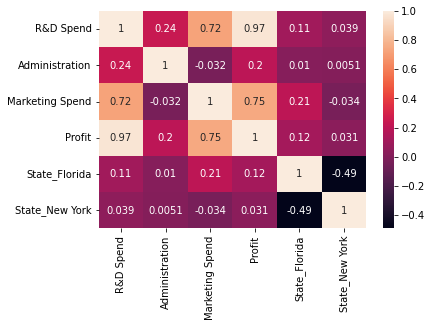

In [93]:
%matplotlib inline
import seaborn as sns
sns.heatmap(data.corr(), annot=True)

In [94]:
data = data.drop('State_New York', axis=1)

<AxesSubplot:>

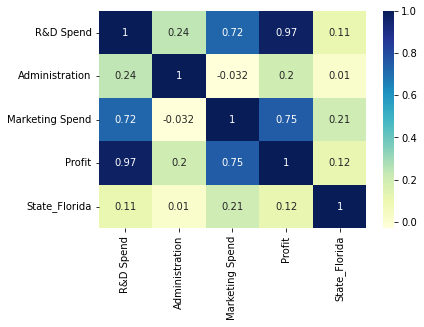

In [95]:
sns.heatmap(data.corr(), annot=True,  cmap="YlGnBu")

In [96]:
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
upper_bound = q3 + 1.5*(q3 - q1)
lower_bound = q1 + 1.5*(q3 - q1)

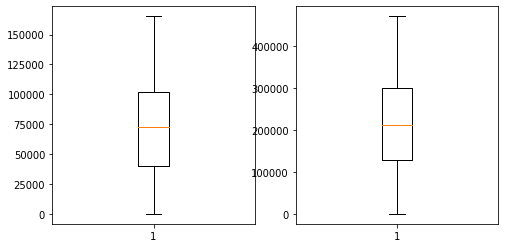

In [97]:
import matplotlib.pyplot as plt 
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].boxplot(data['R&D Spend'])
ax[1].boxplot(data['Marketing Spend'])
plt.show()

array([[<AxesSubplot:title={'center':'R&D Spend'}>,
        <AxesSubplot:title={'center':'Administration'}>],
       [<AxesSubplot:title={'center':'Marketing Spend'}>,
        <AxesSubplot:title={'center':'Profit'}>]], dtype=object)

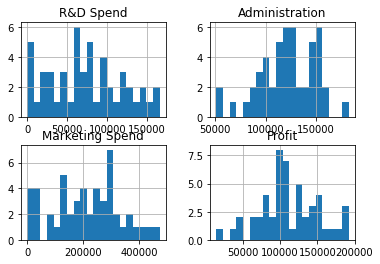

In [98]:
data.drop('State_Florida', axis=1).hist(bins=20)

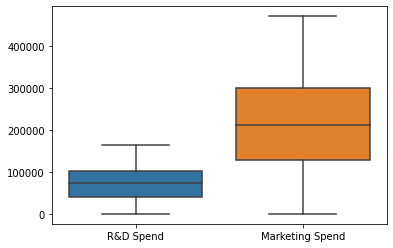

In [99]:
import seaborn as sns  
sns.boxplot(data=data.loc[:, ('R&D Spend', 'Marketing Spend')])
plt.show()


In [100]:
x = data.drop('Profit', axis=1).values
y = data.Profit.values
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=0)

In [101]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [102]:
lr.score(x_train, y_train)

0.9501313108490097

In [103]:
y_pred = lr.predict(x_test)

In [104]:
import numpy as np 
rms = (np.sum((y_pred - y_test))**2/y_test.shape[0])**0.5

In [105]:
y_test.shape[0]

10

In [106]:
rms

12677.743919400216